This notebook contains the comparaison between observed and modeled NEX GDDP CMIP6 data.

Notice: The modeled data only contains one point. Good to do it again but with a zone

# Packages

In [1]:
import pandas as pd
import numpy as np
import os
import os.path
import seaborn as sns
import matplotlib
import geopy.distance
from matplotlib import pyplot as plt

from Graphs_functions import cdf_plot_category_or_obs
from Functions_ImportData import import_filtered_NOAA_obs
from Functions_Indicators import add_year_month_season
from Functions_Indicators import str_month

# Functions

In [2]:
def import_treat_modeled_NEX_GDDP_CMIP6_close_to_stationNOAA(climate_var, unit):
    # import data
    
    path_NEX_GDDP_CMIP6_EmplacementStation=os.path.join(r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file',climate_var,climate_var+'_'+unit+'_day_1970-2014_closest_point_to_NOAA','NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_'+climate_var+'_1970-2014_projectsMoz.csv')
    
    data_NEX_GDDP_CMIP6_EmplacementStation = pd.read_csv(path_NEX_GDDP_CMIP6_EmplacementStation)
    
    data_NEX_GDDP_CMIP6_EmplacementStation = add_year_month_season(data_NEX_GDDP_CMIP6_EmplacementStation,'Date')
    
    return data_NEX_GDDP_CMIP6_EmplacementStation

In [3]:
def treat_NOAA_data(daily_sum_obs_from_NOAA):
    
    daily_sum_obs_from_NOAA = add_year_month_season(daily_sum_obs_from_NOAA,'DATE')
    
    daily_sum_obs_from_NOAA = daily_sum_obs_from_NOAA[daily_sum_obs_from_NOAA['Year'].between(1970,2014)]
    
    daily_sum_obs_from_NOAA=count_na_in_df_NOAA(daily_sum_obs_from_NOAA,'PRCP')
    daily_sum_obs_from_NOAA=count_na_in_df_NOAA(daily_sum_obs_from_NOAA,'TAVG')
    daily_sum_obs_from_NOAA=count_na_in_df_NOAA(daily_sum_obs_from_NOAA,'TMAX')
    daily_sum_obs_from_NOAA=count_na_in_df_NOAA(daily_sum_obs_from_NOAA,'TMIN')
    
    return daily_sum_obs_from_NOAA

In [4]:
def count_na_in_df_NOAA(df,name_col):
    df[name_col+' MISSING']=0
    df[name_col+' MISSING'][df[name_col].isna()]=1
    return df

In [5]:
def select_station(daily_sum_obs_from_NOAA,name_station):
    daily_sum_obs_from_NOAA_name_station = daily_sum_obs_from_NOAA[daily_sum_obs_from_NOAA['NAME']==name_station]
    return daily_sum_obs_from_NOAA_name_station

In [6]:
r'''def add_year_month_season(df,column_date):
    # add Year, month and season columns for graphs
    Year = df[[column_date]].values.reshape(len(df[[column_date]].values),)
    Month = df[[column_date]].values.reshape(len(df[[column_date]].values),)
    Season = df[[column_date]].values.reshape(len(df[[column_date]].values),)
    
    if str(Year[1]).find('-')==2:
        for i in np.arange(0,len(df[[column_date]].values)):
            Year[i]=int(Year[i][6:10])
            Month[i]=int(Month[i][3:5])
            if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September
                Season[i]='Dry'
            else:# humid season is between October and March
                Season[i]='Humid'
            
            Month[i]=str_month(Month[i])
            
    if str(Year[1]).find('-')==4:
        for i in np.arange(0,len(df[[column_date]].values)):
            Year[i]=int(Year[i][0:4])
            Month[i]=int(Month[i][5:7])
            if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September
                Season[i]='Dry'
            else:# humid season is between October and March
                Season[i]='Humid'
            
            Month[i]=str_month(Month[i])
                
    df['Year'] = Year
    df['Month'] = Month
    df['Season'] = Season
    return df'''

"def add_year_month_season(df,column_date):\n    # add Year, month and season columns for graphs\n    Year = df[[column_date]].values.reshape(len(df[[column_date]].values),)\n    Month = df[[column_date]].values.reshape(len(df[[column_date]].values),)\n    Season = df[[column_date]].values.reshape(len(df[[column_date]].values),)\n    \n    if str(Year[1]).find('-')==2:\n        for i in np.arange(0,len(df[[column_date]].values)):\n            Year[i]=int(Year[i][6:10])\n            Month[i]=int(Month[i][3:5])\n            if Month[i]>3 and Month[i]<10: # dry season in Mozambique is between April and September\n                Season[i]='Dry'\n            else:# humid season is between October and March\n                Season[i]='Humid'\n            \n            Month[i]=str_month(Month[i])\n            \n    if str(Year[1]).find('-')==4:\n        for i in np.arange(0,len(df[[column_date]].values)):\n            Year[i]=int(Year[i][0:4])\n            Month[i]=int(Month[i][5:7])\n     

In [ ]:
r'''def str_month(int_m):
    if int_m==1:
        str_m = 'Jan'
    if int_m==2:
        str_m = 'Feb'    
    if int_m==3:
        str_m = 'Mar'
    if int_m==4:
        str_m = 'Apr'
    if int_m==5:
        str_m = 'May'
    if int_m==6:
        str_m = 'Jun'
    if int_m==7:
        str_m = 'Jul'
    if int_m==8:
        str_m = 'Aug'    
    if int_m==9:
        str_m = 'Sep'
    if int_m==10:
        str_m = 'Oct'
    if int_m==11:
        str_m = 'Nov'
    if int_m==12:
        str_m = 'Dec'
    return str_m'''

In [7]:
def compare_2_lines(data_1,data_2,y_name,x_name='Year',tuple_error_bar=('pi',80)):
    
    fig,ax=plt.subplots()
    plt.tight_layout() # Adjust the padding between and around subplots.

    sns.lineplot(data=pr_historic_modeled_NEXGDDPCMIP6_gorongosa.groupby(['Experiment','Model','Year'])[['Mean of the daily precipitation rate mm_per_day']].mean(),x='Year', y='Mean of the daily precipitation rate mm_per_day',hue='Model',errorbar=tuple_error_bar,ax=ax)
    sns.lineplot(data=pr_obs_gorongosa_from_gorongosa.groupby('Year')[['Mean of the daily precipitation rate mm_per_day']].mean(),x='Year', y='Mean of the daily precipitation rate mm_per_day',color='black',label='Observation from Gorongosa',errorbar=tuple_error_bar,ax=ax)
    
    # display the legend
    handles, labels=ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.38, 0.88),title='Legend')
    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    plt.title('Modeled NEX-GDDP-CMIP6 yearly average precipitation accross time at Gorongosa,\n compared to observed yearly average temperature from gorongosa, between '+str(start_year_hist)+' and '+str(stop_year_hist))
    path_figure=r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures\Comp_hist_m_o_pr.png'
    plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
    plt.show()

In [8]:
def compare_3_lines(title_fig,title_x_axis,clim_var,data_1,name_col_1,data_2,name_col_2,source_2,y_name,name_station,x_name='Year',tuple_error_bar=('pi',80)):
    
    fig,ax=plt.subplots()
    plt.tight_layout() # Adjust the padding between and around subplots.
    
     # count the number of missing observation data per year
    missing_data_per_year = data_2.groupby('Year')[[name_col_2+' MISSING']].sum()
    # calculate the yearly mean of the observation data
    obs_data_per_year = data_2.groupby('Year')[[name_col_2]].mean()
    # replace value of the yearly mean by Nan if the year is missing more than 1/3 of its values
    obs_data_per_year[missing_data_per_year[name_col_2+' MISSING']>122] = np.nan
    
    # determine which period we are plotting
    start_year_hist=min(obs_data_per_year.index)
    stop_year_hist=max(obs_data_per_year.index)
    
    # plot modeled data
    sns.lineplot(data=data_1.groupby(['Experiment','Model','Year'])[[name_col_1]].mean(),x='Year', y=name_col_1,hue='Model',errorbar=tuple_error_bar,ax=ax)
    
    ########## plot observed data
    obs_data_per_year=obs_data_per_year.rename(columns={name_col_2:'Observation data from '+source_2})

    if sum(missing_data_per_year.values)==0:
        sns.lineplot(data=obs_data_per_year,palette=['black'],ax=ax)
    else:
        for year in obs_data_per_year.index[0:len(obs_data_per_year.index)-2]:
            try:
                sns.lineplot(data=obs_data_per_year.loc[[year,year+1]],palette=['black'],ax=ax)
            except: # some data dont cover every years
                pass

    ax.set_ylabel('Yearly average '+name_col_1)
    # control labels in legend
    handles1, labels1=ax.get_legend_handles_labels() # register information from first y axis for the legend
    labels1, ids1 = np.unique(labels1, return_index=True)
    labels1=list(labels1)
    handles1 = [handles1[i] for i in ids1]
    
    # make the labels in the legend appear in the order wanted
    if labels1[len(labels1)-1]!='Observation data from '+source_2:
        str_1= labels1[len(labels1)-1]
        str_2= labels1[len(labels1)-2]

        handles1_end = handles1[len(handles1)-1]
        handles1_end_1 = handles1[len(handles1)-2]

        labels1[len(labels1)-1] = str_2
        labels1[len(labels1)-2] = str_1

        handles1[len(handles1)-2] = handles1_end
        handles1[len(handles1)-1] = handles1_end_1
    
    # is there some missing data ? if yes, we plot them. If not, we don t plot them
    if sum(missing_data_per_year[name_col_2+' MISSING'])!=0:
        # there are some missing data in observation data
        ax2 = ax.twinx()
        sns.lineplot(data=missing_data_per_year.reset_index(),x='Year',y=name_col_2+' MISSING',color='red',label='Missing observation data',ax=ax2)
        ax2.set_ylim(0, 370) # impose this scale to know how much data missing for 365 days
        ax2.set_ylabel('Number of missing data in '+source_2+' dataset')
        # set right axis on red
        ax2.yaxis.label.set_color('red')
        ax2.tick_params(axis='y', colors='red')
        ax2.spines['right'].set_color('red')
        handles2, labels2=ax2.get_legend_handles_labels() # register information from first y axis for the legend
        # display the legend
        fig.legend(handles1+handles2, labels1+labels2, loc='upper right', ncol=1, bbox_to_anchor=(1.47, 0.9),title='Legend')
        ax2.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

    else:
        # there are no missing data
        plt.figtext(1.2, 0, "There are no missing data in the observation data", ha="center", fontsize=7, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
        fig.legend(handles1, labels1, loc='upper right', ncol=1, bbox_to_anchor=(1.4, 0.9),title='Legend')

    ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line


    plt.title('Modeled NEX-GDDP-CMIP6 yearly average '+clim_var+' accross time at '+name_station+',\n compared to observed yearly average '+clim_var+' from '+source_2+', between '+str(start_year_hist)+' and '+str(stop_year_hist))
    #path_figure=os.path.join(r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures',title_fig+'.png')
    #plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
    plt.show()

In [9]:
def boxplots_(climate_var,df1,name_col1,df2,name_col2,name_station):
    
    df2['Model']='Observation NOAA'
    df2=df2.rename(columns={name_col2:name_col1})
    
    df_boxplot=pd.concat([df2,df1])

    
    fig,ax=plt.subplots()
    plt.tight_layout() # Adjust the padding between and around subplots.
    cols = ['pink' if (x =='Observation NOAA') else 'skyblue' for x in df_boxplot.Model.drop_duplicates().values]
    sns.boxplot(data=df_boxplot,x=df_boxplot.Model, y=name_col1,palette=cols,whis=[10,90],ax=ax)

    # display the legend
    #handles, labels=ax.get_legend_handles_labels()
    #fig.legend(handles, labels, loc='upper right', ncol=1, bbox_to_anchor=(1.3, 1),title='Legend')
    #ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line
    ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
    plt.title('Compare observation for '+climate_var+' from NOAA,with modeled data\nby NEX-GDDP-CMIP6 between 1970 to 2014 at '+name_station)

    path_figure=r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures\testBoxplotObs.png'
    plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written

    plt.show()

# Import data

## Observations data

### Precipitation and temperature NOAA

In [10]:
daily_sum_obs_from_NOAA = import_filtered_NOAA_obs()

In [11]:
daily_sum_obs_from_NOAA

,STATION,NAME,LATITUDE,LONGITUDE,ELEVATION,DATE,PRCP,PRCP_ATTRIBUTES,TAVG,TAVG_ATTRIBUTES,...,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES,Year,Month,Season,PRCP MISSING,TAVG MISSING,TMAX MISSING,TMIN MISSING
0,MZM00067223,"MONTEPUEZ, MZ",-13.133,39.033,535.0,1974-04-05,2.0,",,S",23.8,"H,,S",...,",D,S",20.0,",,S",1974,Apr,Dry,0,0,0,0
1,MZM00067223,"MONTEPUEZ, MZ",-13.133,39.033,535.0,1974-06-17,0.0,",,S",18.2,"H,,S",...,",,S",11.0,",,S",1974,Jun,Dry,0,0,0,0
2,MZM00067223,"MONTEPUEZ, MZ",-13.133,39.033,535.0,1974-07-13,0.0,",,S",17.8,"H,,S",...,",,S",14.0,",,S",1974,Jul,Dry,0,0,0,0
3,MZM00067223,"MONTEPUEZ, MZ",-13.133,39.033,535.0,1974-08-08,0.0,",,S",22.8,"H,,S",...,",,S",18.0,",,S",1974,Aug,Dry,0,0,0,0
4,MZM00067223,"MONTEPUEZ, MZ",-13.133,39.033,535.0,1975-06-23,NaN,NaN,22.3,"H,,S",...,",,S",16.0,",,S",1975,Jun,Dry,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53978,MZ000067297,"BEIRA, MZ",-19.800,34.900,16.0,2014-11-08,0.0,",,S",25.0,"H,,S",...,",,S",21.0,",,S",2014,Nov,Humid,0,0,0,0
53979,MZ000067297,"BEIRA, MZ",-19.800,34.900,16.0,2014-11-09,NaN,NaN,26.0,"H,,S",...,",,S",20.5,",,S",2014,Nov,Humid,1,0,0,0
53980,MZ000067297,"BEIRA, MZ",-19.800,34.900,16.0,2014-11-10,NaN,NaN,27.2,"H,,S",...,",,S",19.9,",,S",2014,Nov,Humid,1,0,0,0
53981,MZ000067297,"BEIRA, MZ",-19.800,34.900,16.0,2014-11-12,NaN,NaN,26.3,"H,,S",...,",,S",23.4,",,S",2014,Nov,Humid,1,0,0,0


In [ ]:
path = r'C:\Users\CLMRX\COWI\A248363 - Climate analysis - Documents\General\CRVA_tool\Master_thesis\Project\3 - Implementation\1 - Data\1-BC\NOAA-ClimateDataOnline\3370204.csv'
daily_sum_obs_from_NOAA = pd.read_csv(path)

In [ ]:
daily_sum_obs_from_NOAA=treat_NOAA_data(daily_sum_obs_from_NOAA) # add Year Month, and count Nan, select between 1970 and 2014

In [ ]:
# take out impossible observation data

## We can see for some maximum temperature observation data that some data points are completely impossible 
#  (100 for minimum or maximum temperature at Chimoio and Beira sometimes)
daily_sum_obs_from_NOAA=daily_sum_obs_from_NOAA[daily_sum_obs_from_NOAA['TMAX']<80]
daily_sum_obs_from_NOAA=daily_sum_obs_from_NOAA[daily_sum_obs_from_NOAA['TMIN']<80]
daily_sum_obs_from_NOAA=daily_sum_obs_from_NOAA[daily_sum_obs_from_NOAA['TAVG']<80]

In [ ]:
daily_sum_obs_from_NOAA

In [13]:
daily_sum_obs_from_NOAA_BEIRA=select_station(daily_sum_obs_from_NOAA,'BEIRA, MZ')

In [14]:
daily_sum_obs_from_NOAA_PEMBA=select_station(daily_sum_obs_from_NOAA,'PEMBA, MZ')

In [15]:
daily_sum_obs_from_NOAA_CHIMOIO=select_station(daily_sum_obs_from_NOAA,'CHIMOIO, MZ')

### Precipitation from Gorongosa 

In [12]:
path = r'C:\Users\CLMRX\COWI\A248363 - Climate analysis - Documents\General\CRVA_tool\Master_thesis\Project\3 - Implementation\1 - Data\1-BC\DirecltyfromMoz\Precipitation_Gorongosa_reformat.csv'
pr_obs_gorongosa_from_gorongosa = pd.read_csv(path)
pr_obs_gorongosa_from_gorongosa=add_year_month_season(pr_obs_gorongosa_from_gorongosa,'time')
pr_obs_gorongosa_from_gorongosa['pr'][pr_obs_gorongosa_from_gorongosa['pr']=='s/i'] = pr_obs_gorongosa_from_gorongosa['pr'].iloc[0]
pr_obs_gorongosa_from_gorongosa['pr'] = pr_obs_gorongosa_from_gorongosa['pr'].astype(float)
pr_obs_gorongosa_from_gorongosa

,time,pr,Year,Month,Season
0,1980-01-01,NaN,1980,Jan,Humid
1,1980-01-02,NaN,1980,Jan,Humid
2,1980-01-03,NaN,1980,Jan,Humid
3,1980-01-04,NaN,1980,Jan,Humid
4,1980-01-05,NaN,1980,Jan,Humid
...,...,...,...,...,...
14971,2020-12-27,2.7,2020,Dec,Humid
14972,2020-12-28,0.0,2020,Dec,Humid
14973,2020-12-29,0.0,2020,Dec,Humid
14974,2020-12-30,138.4,2020,Dec,Humid


## MODELED DATA

### Precipitation NEX-GDDP-CMIP6

In [16]:
# to compare historic modelisation with NOAA observation data
path_model_pr_past = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1970-2014_CLosest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_pr_1970-2014_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path_model_pr_past)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [17]:
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past

,Name station,Experiment,Model,Latitude,Longitude,Date,Mean of the daily precipitation rate mm/day,Year,Month,Season
493080,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,01-01-1970,15.221261,1970,Jan,Humid
493081,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,02-01-1970,15.258603,1970,Jan,Humid
493082,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,03-01-1970,3.232764,1970,Jan,Humid
493083,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,04-01-1970,0.340715,1970,Jan,Humid
493084,"BEIRA, MZ",historical,ACCESS-CM2,-19.875,34.875,05-01-1970,2.544045,1970,Jan,Humid
...,...,...,...,...,...,...,...,...,...,...
739615,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,27-12-2014,3.778890,2014,Dec,Humid
739616,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,28-12-2014,5.969581,2014,Dec,Humid
739617,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,29-12-2014,3.112424,2014,Dec,Humid
739618,"BEIRA, MZ",historical,TaiESM1,-19.875,34.875,30-12-2014,0.000000,2014,Dec,Humid


In [18]:
# pas convaincue que le ligne suivante soit tres utile

In [19]:
# to compare projections with NOAA observation data
path_past_proj = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\pr\pr_mm_per_day_day_1950-2100\pr_1950-2100_projectsMoz.csv'
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj = pd.read_csv(path_past_proj)
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj=add_year_month_season(pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj,'Date')
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Pemba = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='Pemba_EIB']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Chimoio = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='Chimoio_WTP_EIB']
pr_model_NEX_GDDPCMIP6_to_comp_NOAA_project_Mutua = pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[pr_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name project']=='WTP_Mutua_EIB']

### Temperature NEX-GDDP-CMIP6

In [20]:
# to compare with NOAA observation data
path_model_tas_past = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tas\tas_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tas_1970-2014_projectsMoz.csv'
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path_model_tas_past)
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

### Maximum temperature NEX-GDDP-CMIP6

In [21]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmax\tasmax_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmax_1970-2014_projectsMoz.csv'
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path)
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [22]:
# to compare projections with NOAA observation data
path_past_proj_tasmax = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmax\tasmax_Celsius_day_1950-2100_Closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmax_1950-2100.csv'
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj = pd.read_csv(path_past_proj_tasmax)
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj=add_year_month_season(tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj,'Date')
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_CHIMOIO = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_PEMBA = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_BEIRA = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj['Name station']=='BEIRA, MZ']

### Minimum temperature NEX GDDP CMIP6

In [23]:
# to compare with NOAA observation data
path = r'\\COWI.net\projects\A245000\A248363\CRVA\Datasets\NEX-GDDP-CMIP6-AllMoz\csv_file\tasmin\tasmin_Celsius_day_1970-2014_closest_to_NOAA\NEXGDDPCMIP6_at_same_emplacement_as_NOAA_stationPembaChimoioBeira_tasmin_1970-2014_projectsMoz.csv'
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = pd.read_csv(path)
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past=add_year_month_season(tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past,'Date')
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

# Compare NOAA station with NEX-GDDP-CMIP6 data at the same emplacement

## Temperature

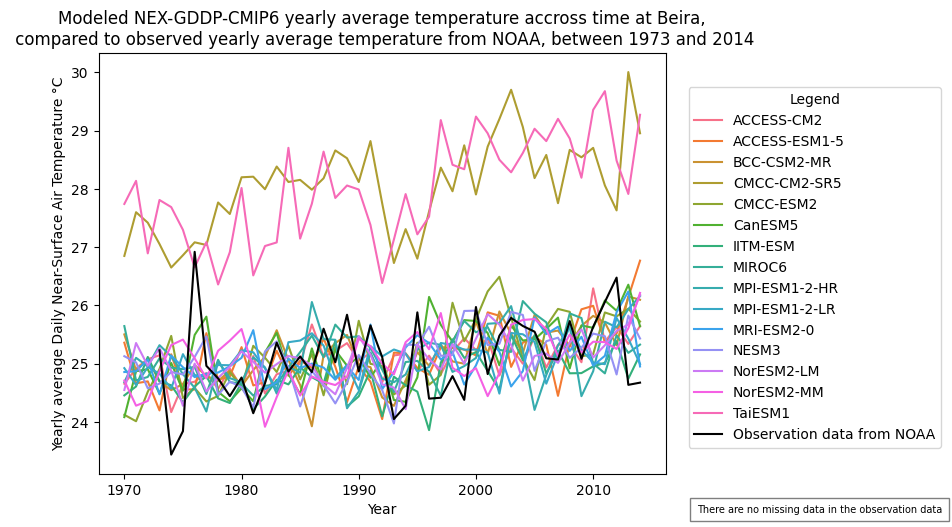

In [24]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

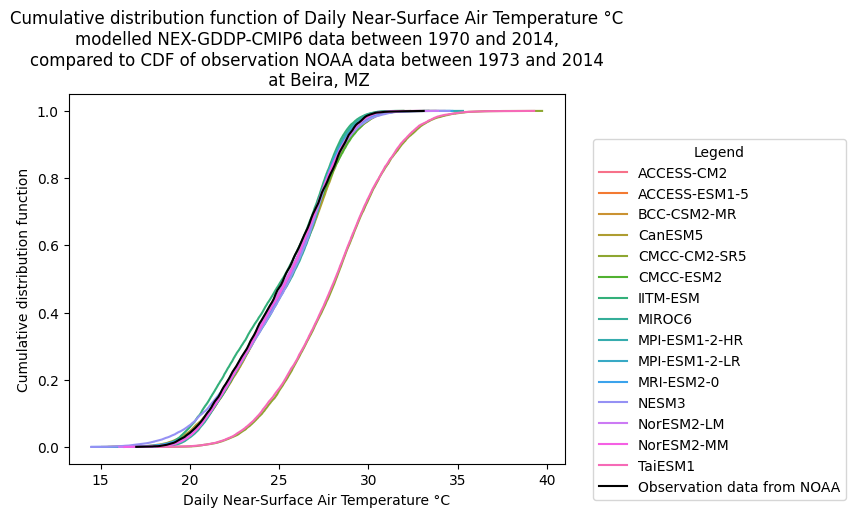

In [25]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TAVG',source_obs='NOAA')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_15592\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


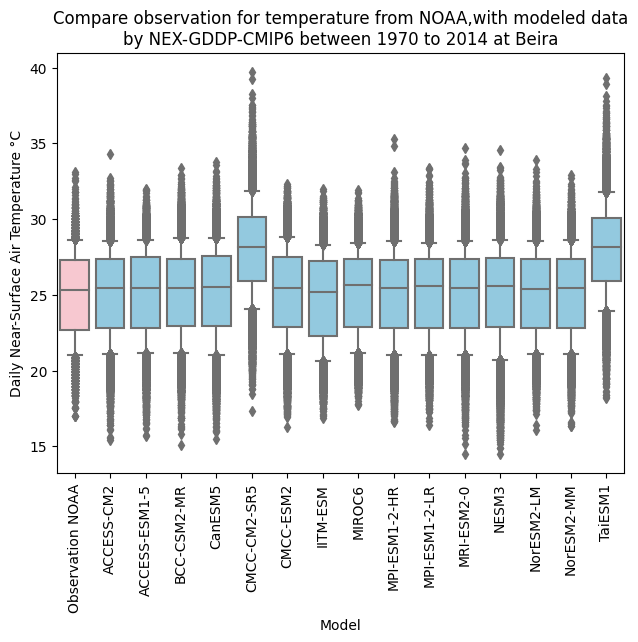

In [26]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','Beira')

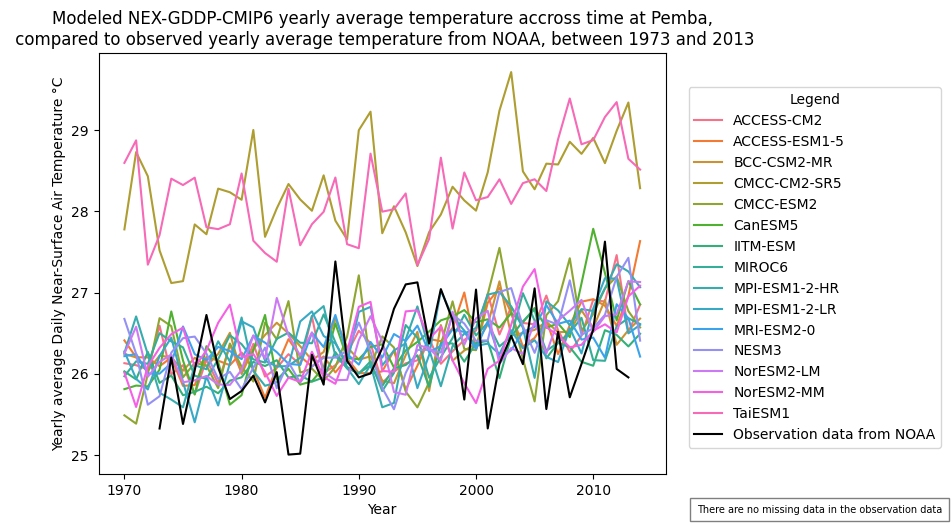

In [27]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

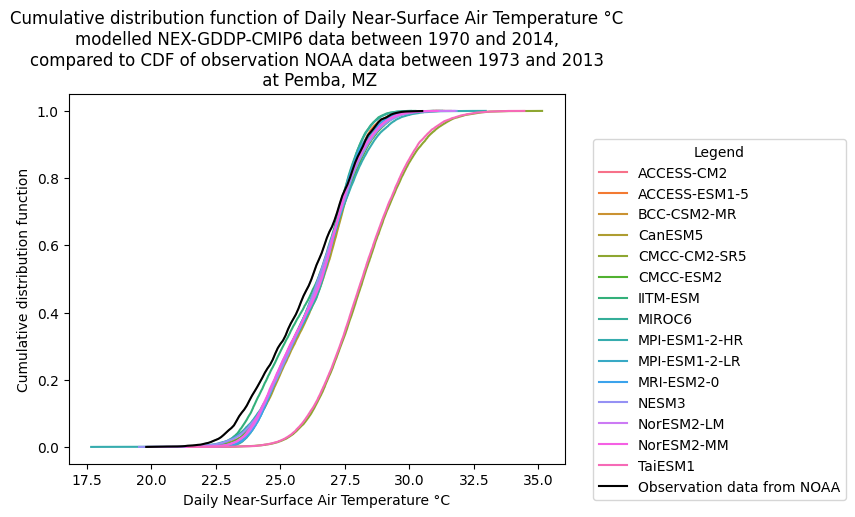

In [28]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TAVG',source_obs='NOAA')

C:\Users\CLMRX\AppData\Local\Temp\1\ipykernel_15592\1856932821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Model']='Observation NOAA'


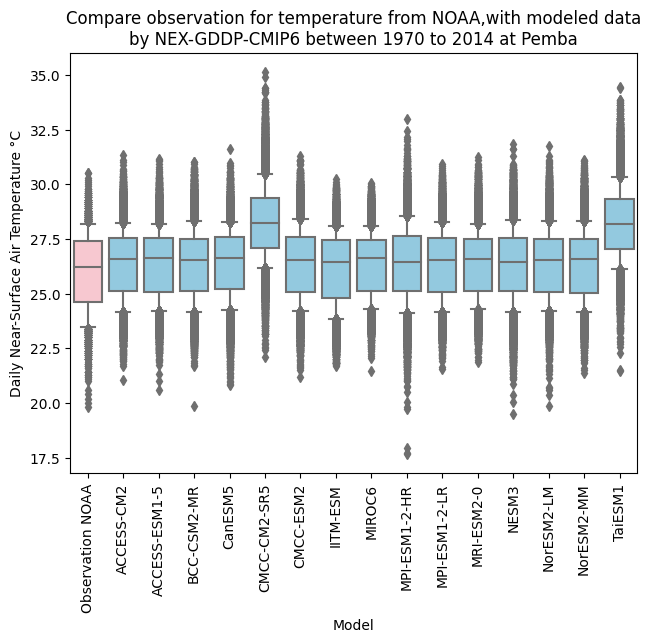

In [29]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

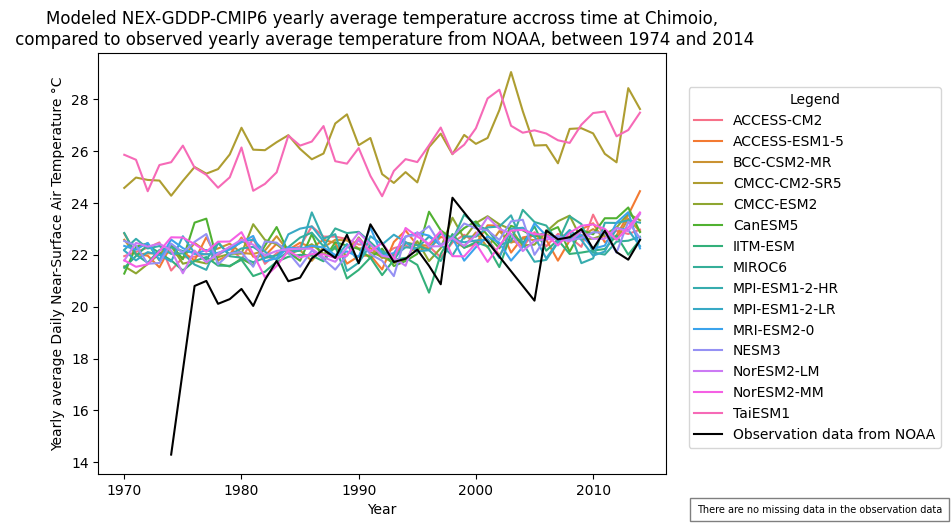

In [30]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

<Axes: xlabel='Year'>

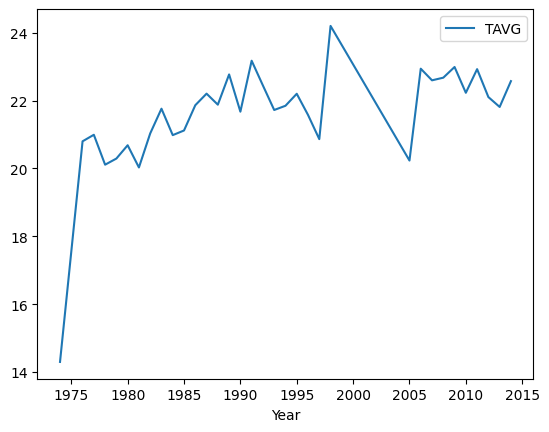

In [31]:
daily_sum_obs_from_NOAA_CHIMOIO[['Year','TAVG']].groupby('Year').mean().plot()

In [32]:
sum(daily_sum_obs_from_NOAA_CHIMOIO[['TAVG MISSING']].values)

array([0], dtype=int64)

In [33]:
title_fig = 'test'
title_x_axis = 'Mean'
clim_var = 'temperature'
data_1 = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past
name_col_1 = 'Daily Near-Surface Air Temperature °C'
data_2 = daily_sum_obs_from_NOAA_CHIMOIO
name_col_2 = 'TAVG'
source_2 = 'NOAA'
y_name = 'Annual mean daily temperature °C'
name_station = 'Chimoio'
x_name='Year'
tuple_error_bar=('pi',80)
    

In [34]:
if sum(missing_data_per_year.values)==0:
    print('lapin')

NameError: name 'missing_data_per_year' is not defined

In [ ]:
fig,ax=plt.subplots()
plt.tight_layout() # Adjust the padding between and around subplots.

 # count the number of missing observation data per year
missing_data_per_year = data_2.groupby('Year')[[name_col_2+' MISSING']].sum()
# calculate the yearly mean of the observation data
obs_data_per_year = data_2.groupby('Year')[[name_col_2]].mean()
# replace value of the yearly mean by Nan if the year is missing more than 1/3 of its values
obs_data_per_year[missing_data_per_year[name_col_2+' MISSING']>122] = np.nan

# determine which period we are plotting
start_year_hist=min(obs_data_per_year.index)
stop_year_hist=max(obs_data_per_year.index)

# plot modeled data
sns.lineplot(data=data_1.groupby(['Experiment','Model','Year'])[[name_col_1]].mean(),x='Year', y=name_col_1,hue='Model',errorbar=tuple_error_bar,ax=ax)

########## plot observed data
obs_data_per_year=obs_data_per_year.rename(columns={name_col_2:'Observation data from '+source_2})

if sum(missing_data_per_year.values)==0:
    sns.lineplot(data=obs_data_per_year,palette=['black'],ax=ax)
else:
    for year in obs_data_per_year.index[0:len(obs_data_per_year.index)-2]:
        try:
            sns.lineplot(data=obs_data_per_year.loc[[year,year+1]],palette=['black'],ax=ax)
        except: # some data dont cover every years
            pass
r'''
ax.set_ylabel('Yearly average '+name_col_1)
# control labels in legend
handles1, labels1=ax.get_legend_handles_labels() # register information from first y axis for the legend
labels1, ids1 = np.unique(labels1, return_index=True)
labels1=list(labels1)
handles1 = [handles1[i] for i in ids1]

# make the labels in the legend appear in the order wanted
if labels1[len(labels1)-1]!='Observation data from '+source_2:
    str_1= labels1[len(labels1)-1]
    str_2= labels1[len(labels1)-2]

    handles1_end = handles1[len(handles1)-1]
    handles1_end_1 = handles1[len(handles1)-2]

    labels1[len(labels1)-1] = str_2
    labels1[len(labels1)-2] = str_1

    handles1[len(handles1)-2] = handles1_end
    handles1[len(handles1)-1] = handles1_end_1

# is there some missing data ? if yes, we plot them. If not, we don t plot them
if sum(missing_data_per_year[name_col_2+' MISSING'])!=0:
    # there are some missing data in observation data
    ax2 = ax.twinx()
    sns.lineplot(data=missing_data_per_year.reset_index(),x='Year',y=name_col_2+' MISSING',color='red',label='Missing observation data',ax=ax2)
    ax2.set_ylim(0, 370) # impose this scale to know how much data missing for 365 days
    ax2.set_ylabel('Number of missing data in '+source_2+' dataset')
    # set right axis on red
    ax2.yaxis.label.set_color('red')
    ax2.tick_params(axis='y', colors='red')
    ax2.spines['right'].set_color('red')
    handles2, labels2=ax2.get_legend_handles_labels() # register information from first y axis for the legend
    # display the legend
    fig.legend(handles1+handles2, labels1+labels2, loc='upper right', ncol=1, bbox_to_anchor=(1.47, 0.9),title='Legend')
    ax2.get_legend().remove() # this line permits to have a common legend for the boxplots and the line

else:
    # there are no missing data
    plt.figtext(1.2, 0, "There are no missing data in the observation data", ha="center", fontsize=7, bbox={"facecolor":"white", "alpha":0.5, "pad":5})
    fig.legend(handles1, labels1, loc='upper right', ncol=1, bbox_to_anchor=(1.4, 0.9),title='Legend')

ax.get_legend().remove() # this line permits to have a common legend for the boxplots and the line


plt.title('Modeled NEX-GDDP-CMIP6 yearly average '+clim_var+' accross time at '+name_station+',\n compared to observed yearly average '+clim_var+' from '+source_2+', between '+str(start_year_hist)+' and '+str(stop_year_hist))
#path_figure=os.path.join(r'C:\Users\CLMRX\OneDrive - COWI\Documents\GitHub\CRVA_tool\outputs\figures',title_fig+'.png')
#plt.savefig(path_figure,format ='png') # savefig or save text must be before plt.show. for savefig, format should be explicity written
plt.show()
'''

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','Chimoio')

## Maximum temperature

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','NOAA','Annual mean maximum daily temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','Beira')

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','NOAA','Annual mean maximum daily temperature °C','PEMBA')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','Pemba')

In [ ]:
df = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past_proj_PEMBA[['Experiment','Year','Model','Daily Maximum Near-Surface Air Temperature °C']]#.groupby(['Experiment','Year'])[['Daily Maximum Near-Surface Air Temperature °C']].mean().reset_index()
cdf_plot_category_or_obs('Pemba, MZ',df_initial=df,name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Experiment',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean maximum daily temperature °C','CHIMOIO')

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','Chimoio')

## Minimum temperature

In [ ]:
# Beira

In [ ]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMIN','NOAA','Annual mean daily minimum temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('BEIRA, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMIN',source_obs='NOAA')

In [ ]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMIN','Beira')

In [ ]:
# pemba

In [ ]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMIN','NOAA','Annual mean daily minimum temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('PEMBA, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMIN',source_obs='NOAA')

In [ ]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMIN','Pemba')

In [ ]:
# Chimoio

In [ ]:
compare_3_lines('test','Mean','minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMIN','NOAA','Annual mean daily minimum temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('CHIMOIO, MZ',df_initial=tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Minimum Near-Surface Air Temperature °C']],name_column_df='Daily Minimum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMIN',source_obs='NOAA')

In [ ]:
boxplots_('minimum temperature',tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Minimum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMIN','Chimoio')

## Precipitation

In [ ]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_BEIRA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='PRCP',source_obs='NOAA')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_BEIRA,'PRCP','Beira')

In [ ]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_PEMBA,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Pemba')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='PRCP',source_obs='NOAA')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_PEMBA,'PRCP','Pemba')

In [ ]:
compare_3_lines('test','Mean','precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','NOAA','Yearly mean of the mean daily precipitation rate mm/day','Chimoio')

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Mean of the daily precipitation rate mm/day']],name_column_df='Mean of the daily precipitation rate mm/day',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='PRCP',source_obs='NOAA')

In [ ]:
boxplots_('precipitation',pr_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Mean of the daily precipitation rate mm/day',daily_sum_obs_from_NOAA_CHIMOIO,'PRCP','Chimoio')

# What needs to be changed ?
## Which models need to be taken out ?

those graphs confirm that for precipitation and maximum temperature, no need to kill a model. But, for temperature and minimum temeprature, 'TAIESM1' and 'CMCC-CM2-SR5' are not following the trend. Take out those 2 models for all climate variable

In [ ]:
# take out models for maximum temperature
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for average temperature
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for maximum temperature
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# take out models for minimum temperature
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmin_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

## Temperature : take out some models

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']

In [ ]:
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tas_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','NOAA','Annual mean daily temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TAVG','Beira')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','NOAA','Annual mean daily temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('Pemba, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TAVG','Pemba')

In [ ]:
compare_3_lines('test','Mean','temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','NOAA','Annual mean daily temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('Chimoio, MZ',df_initial=tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Near-Surface Air Temperature °C']],name_column_df='Daily Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TAVG',source_obs='NOAA')

In [ ]:
boxplots_('temperature',tas_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TAVG','CHIMOIO')

## Maximum temperature : take out some models (the ones that were not performing well for average temperature) from modelled data and some extreme values that are not plausible from observation data

In [ ]:
# take out models 
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='CMCC-CM2-SR5']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Model']!='TaiESM1']

In [ ]:
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='CHIMOIO, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='PEMBA, MZ']
tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past = tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past[tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_past['Name station']=='BEIRA, MZ']

In [ ]:
# chimoio

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','NOAA','Annual mean daily maximum temperature °C','Chimoio')

In [ ]:
cdf_plot_category_or_obs('CHIMOIO, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_CHIMOIO,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_CHIMOIO_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_CHIMOIO,'TMAX','Chimoio')

In [ ]:
# pemba

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','NOAA','Annual mean daily maximum temperature °C','Pemba')

In [ ]:
cdf_plot_category_or_obs('PEMBA, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_PEMBA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_PEMBA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_PEMBA,'TMAX','Pemba')

In [ ]:
# Beira

In [ ]:
compare_3_lines('test','Mean','maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','NOAA','Annual mean daily maximum temperature °C','Beira')

In [ ]:
cdf_plot_category_or_obs('Beira, MZ',df_initial=tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past[['Model','Year','Daily Maximum Near-Surface Air Temperature °C']],name_column_df='Daily Maximum Near-Surface Air Temperature °C',source_df='NEX-GDDP-CMIP6',category='Model',obs_initial=daily_sum_obs_from_NOAA_BEIRA,name_column_obs='TMAX',source_obs='NOAA')

In [ ]:
boxplots_('maximum temperature',tasmax_model_NEX_GDDPCMIP6_to_comp_NOAA_BEIRA_past,'Daily Maximum Near-Surface Air Temperature °C',daily_sum_obs_from_NOAA_BEIRA,'TMAX','Beira')